<h1>Using a non-linear model to predict if a website will be finished based on the expected hours and the price paid<h1>

In [32]:
import pandas as pd

data = pd.read_csv('projects.csv')
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Let's change the "unfinished" column to "finished" so it's easier to understand

In [33]:
change = {
    0: 1,
    1: 0
}

data['finished'] = data.unfinished.map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

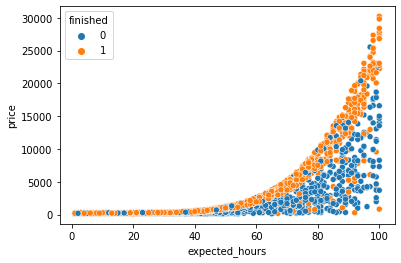

In [34]:
import seaborn as sns

# Let's see the graph
sns.scatterplot(x="expected_hours", y="price", hue="finished", data=data)

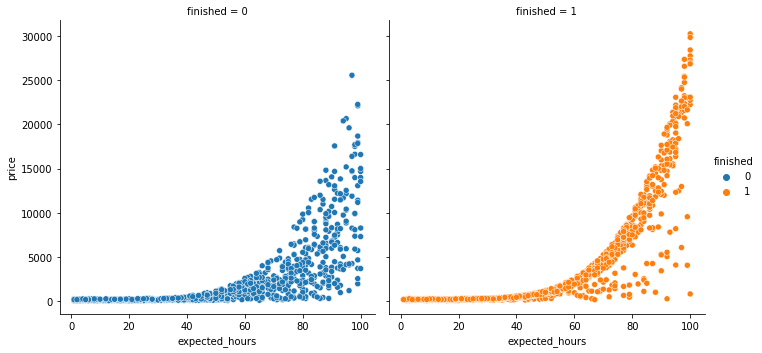

In [35]:
# Seeing it seperately
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished", data=data)

In [36]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)

print("We will train with %d elements and test with %d elements" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The model's accuracy was %.2f%%" % accuracy)

We will train with 1617 elements and test with 540 elements
The model's accuracy was 47.41%


C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h3>The accuracy seems very bad. Why is that? Let's explore<h3>

In [38]:
# Let's get the min an max values for x and y so we can plot multiple points (pixels) in the graph in the model to see how it's doing its predictions
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

In [39]:
import numpy as np

pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [40]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

In [41]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

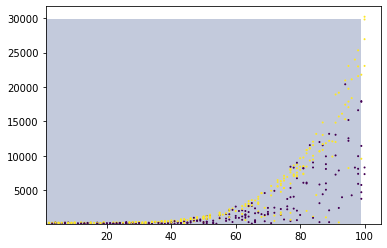

In [42]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)